# Top Songs on Spotify from 2000 to 2019

In [1]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np
from numpy import mean, std
import datetime as dt

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [2]:
# Read and extract from the dataset.

df=pd.read_csv('spotify_top_songs.csv')

In [3]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
# Shape of the data

df.shape

(2000, 18)

In [5]:
df = df[(df['popularity'] >= 10) & (~df['genre'].str.contains('World/Traditional')) 
        & (~df['genre'].str.contains('easy listening')) & (~df['genre'].str.contains('blues')) 
        & (~df['genre'].str.contains('jazz')) & (~df['genre'].str.contains('classical'))]

In [6]:
# Data type of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1800 non-null   object 
 1   song              1800 non-null   object 
 2   duration_ms       1800 non-null   int64  
 3   explicit          1800 non-null   bool   
 4   year              1800 non-null   int64  
 5   popularity        1800 non-null   int64  
 6   danceability      1800 non-null   float64
 7   energy            1800 non-null   float64
 8   key               1800 non-null   int64  
 9   loudness          1800 non-null   float64
 10  mode              1800 non-null   int64  
 11  speechiness       1800 non-null   float64
 12  acousticness      1800 non-null   float64
 13  instrumentalness  1800 non-null   float64
 14  liveness          1800 non-null   float64
 15  valence           1800 non-null   float64
 16  tempo             1800 non-null   float64


In [7]:
# Checking for null values.

df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [8]:
# Checking for unique values.

df.nunique()

artist               769
song                1691
duration_ms         1624
explicit               2
year                  23
popularity            68
danceability         549
energy               556
key                   12
loudness            1526
mode                   2
speechiness          792
acousticness        1116
instrumentalness     701
liveness             738
valence              732
tempo               1656
genre                 42
dtype: int64

In [9]:
# Description of the data

df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,229871.887778,2009.227222,65.794444,0.668270,0.722248,5.406111,-5.483454,0.547778,0.104747,0.127225,0.013142,0.181942,0.553813,120.218021
std,39551.732896,5.882302,10.872651,0.141338,0.151044,3.609183,1.917044,0.497850,0.097412,0.170319,0.080265,0.141233,0.220115,27.224547
min,113000.000000,1998.000000,11.000000,0.177000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000021,0.000000,0.021500,0.040600,60.019000
25%,204630.000000,2004.000000,59.000000,0.581000,0.625000,2.000000,-6.483250,0.000000,0.039575,0.014200,0.000000,0.088350,0.393000,98.030000
50%,224239.500000,2009.000000,67.000000,0.677000,0.736500,6.000000,-5.266500,1.000000,0.061000,0.055700,0.000000,0.125000,0.560000,120.025000
75%,250212.250000,2014.000000,74.000000,0.765250,0.840000,8.000000,-4.145500,1.000000,0.132000,0.175250,0.000064,0.241250,0.733250,135.103250
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.843000,0.973000,210.851000


In [10]:
genre_df = df['genre'].str.get_dummies(sep=', ')
expanded_df = pd.concat([df, genre_df], axis=1)
expanded_df = expanded_df.drop(['genre', 'set()'], axis=1)

expanded_df.iloc[:, 17:] = expanded_df.iloc[:, 17:].replace({0: False, 1: True})
expanded_df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Dance/Electronic,Folk/Acoustic,R&B,country,hip hop,latin,metal,pop,rock
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,False,False,False,False,False,False,False,True,False
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,False,False,False,False,False,False,False,True,True
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,False,False,False,True,False,False,False,True,False
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,False,False,False,False,False,False,True,False,True
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,False,False,False,False,False,False,False,True,False
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,False,False,False,False,False,False,False,True,False
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,False,False,False,True,True,False,False,False,False
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,False,False,False,False,False,False,False,True,False


In [11]:
fig=px.imshow(df.corr(), text_auto=True, height=1000, width=1000, color_continuous_scale=px.colors.sequential.Greens, 
              aspect='auto')
fig.update_layout(title_x=0.5, title={'text':'<b>Correlation of columns</b>','font':{'size':25}}, 
                  title_font_family="Arial", title_font_color="seagreen")
fig.show()

In [12]:
fig=px.treemap(df, path=[px.Constant('Singer'), 'artist', 'genre', 'song'], values='popularity')
fig.update_traces(root_color='seagreen', textfont_color='white')
fig.update_layout(title_x=0.5, title={'text':'<b>Tree Map of Singers</b>','font':{'size':25}}, 
                  title_font_family="Arial", title_font_color="seagreen")
fig.show()

In [13]:
fig = px.bar(df.groupby('artist', as_index=False).count().sort_values(by='song', ascending=False).head(50), 
       x='artist', y='song', labels={'song':'Total Songs', 'artist':'Artist'}, color_discrete_sequence=['limegreen'], 
       text='song', template='plotly_white')
fig.update_layout(title_x=0.5, title={'text':'<b>Number of Songs Recorded by Each Singer</b>','font':{'size':25}}, 
                  title_font_family="Arial", title_font_color="grey")
fig.show()

In [14]:
fig = px.bar(df.groupby('artist', as_index=False).sum().sort_values(by='popularity', ascending=False).head(15), 
             x='artist', y='popularity', labels={'popularity':'Popularity', 'artist':'Artist'}, 
             color_discrete_sequence=['limegreen'], text='popularity', template='plotly_white')
fig.update_layout(title_x=0.5, title={'text':'<b>Top 15 Singers</b>','font':{'size':25}}, 
                  title_font_family="Arial", title_font_color="grey")
fig.show()

In [15]:
fig=px.pie(df.groupby('explicit', as_index=False).count().sort_values(by='song', ascending=False), names='explicit', 
           values='song', labels={'song':'Total songs', 'explicit':'Explicit'}, hole=.4, 
           color_discrete_sequence=['magenta', 'limegreen'])
fig.update_layout(title_x=0.5, title={'text':'<b>Songs having explicit content</b>','font':{'size':25}}, 
                  title_font_family="Arial", title_font_color="grey")
fig.show()

In [16]:
fig = px.box(df, x='explicit', y='popularity', color='explicit', template='plotly_white', 
             color_discrete_sequence=['magenta', 'limegreen'], labels={'explicit':'Explicit', 'popularity':'Popularity'})
fig.update_layout(title_x=0.5, title={'text':'<b>Popularity based on explicit content</b>','font':{'size':25}}, 
                  title_font_family="Arial", title_font_color="grey")
fig.show()

In [17]:
genre_counts = expanded_df.iloc[:, 17:].sum()
genre_df = pd.DataFrame({'genre': genre_counts.index, 'count': genre_counts.values})
genre_df = genre_df.sort_values(by='count', ascending=False)

fig = px.bar(genre_df, x='genre', y='count', color='genre', labels={'count': 'Count', 'genre': 'Genre'}, text='count',
             template='plotly_white')
fig.update_layout(title_x=0.5, title={'text':'<b>Number of Songs by Genre</b>','font':{'size':25}}, 
                  title_font_family="Arial", title_font_color="grey")
fig.show()

In [18]:
genres = expanded_df.iloc[:, 17:]

melted_df = expanded_df.melt(id_vars=['popularity'], value_vars=genres.columns)

melted_df = melted_df[melted_df['value']]

fig = px.box(melted_df, x='variable', y='popularity', color='variable', labels={'variable': 'Genre', 'popularity': 'Popularity'},
             title='<b>Box Plot of Popularity by Genre</b>', template='plotly_white')

fig.update_layout(title_x=0.5, showlegend=False)
fig.show()

In [19]:
genres = expanded_df.iloc[:, 17:]

melted_df = expanded_df.melt(id_vars=['popularity'], value_vars=genres.columns)

melted_df = melted_df[melted_df['value'] == 1]

fig = px.violin(melted_df, x='variable', y='popularity', box=True, points='all',
                color='variable', labels={'variable': 'Genre', 'popularity': 'Popularity'},
                title='<b>Violin Plot of Popularity by Genre</b>', template='plotly_white')

fig.update_layout(title_x=0.5, showlegend=False)
fig.show()

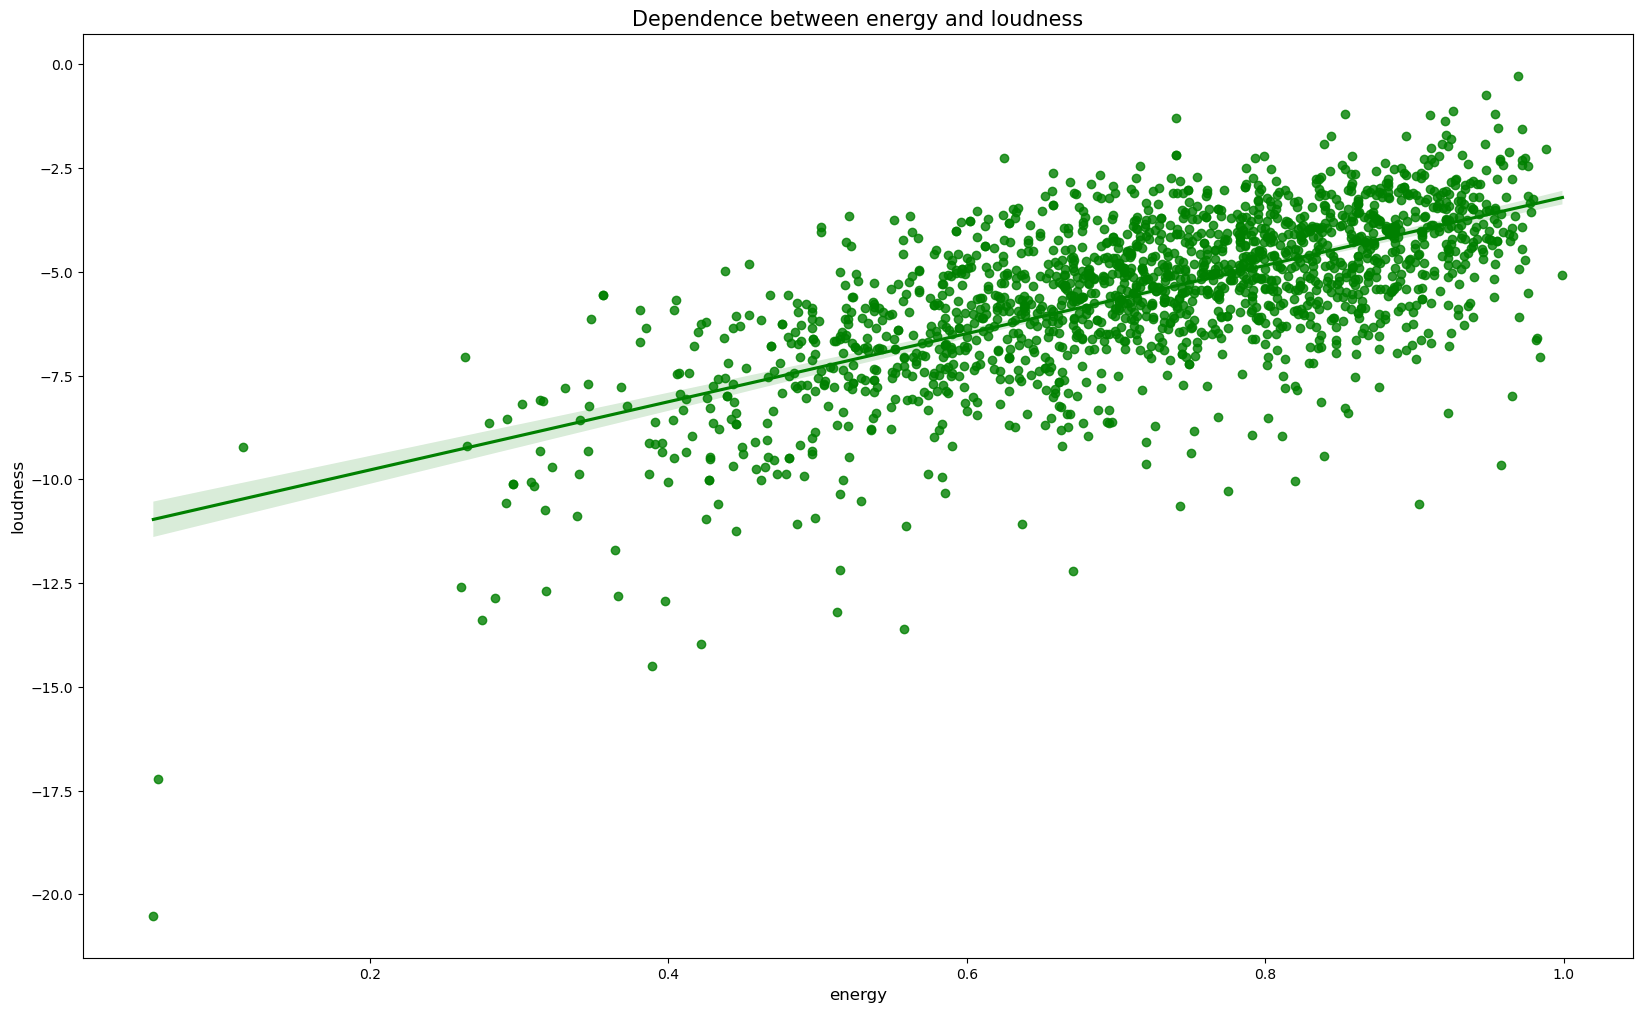

In [20]:
plt.figure(figsize=(20,12))
sns.regplot(data=df, x='energy', y='loudness', color='green')
plt.ylabel('loudness', fontsize=12)
plt.xlabel("energy", fontsize=12)
plt.title('Dependence between energy and loudness', fontsize=15)
plt.show()

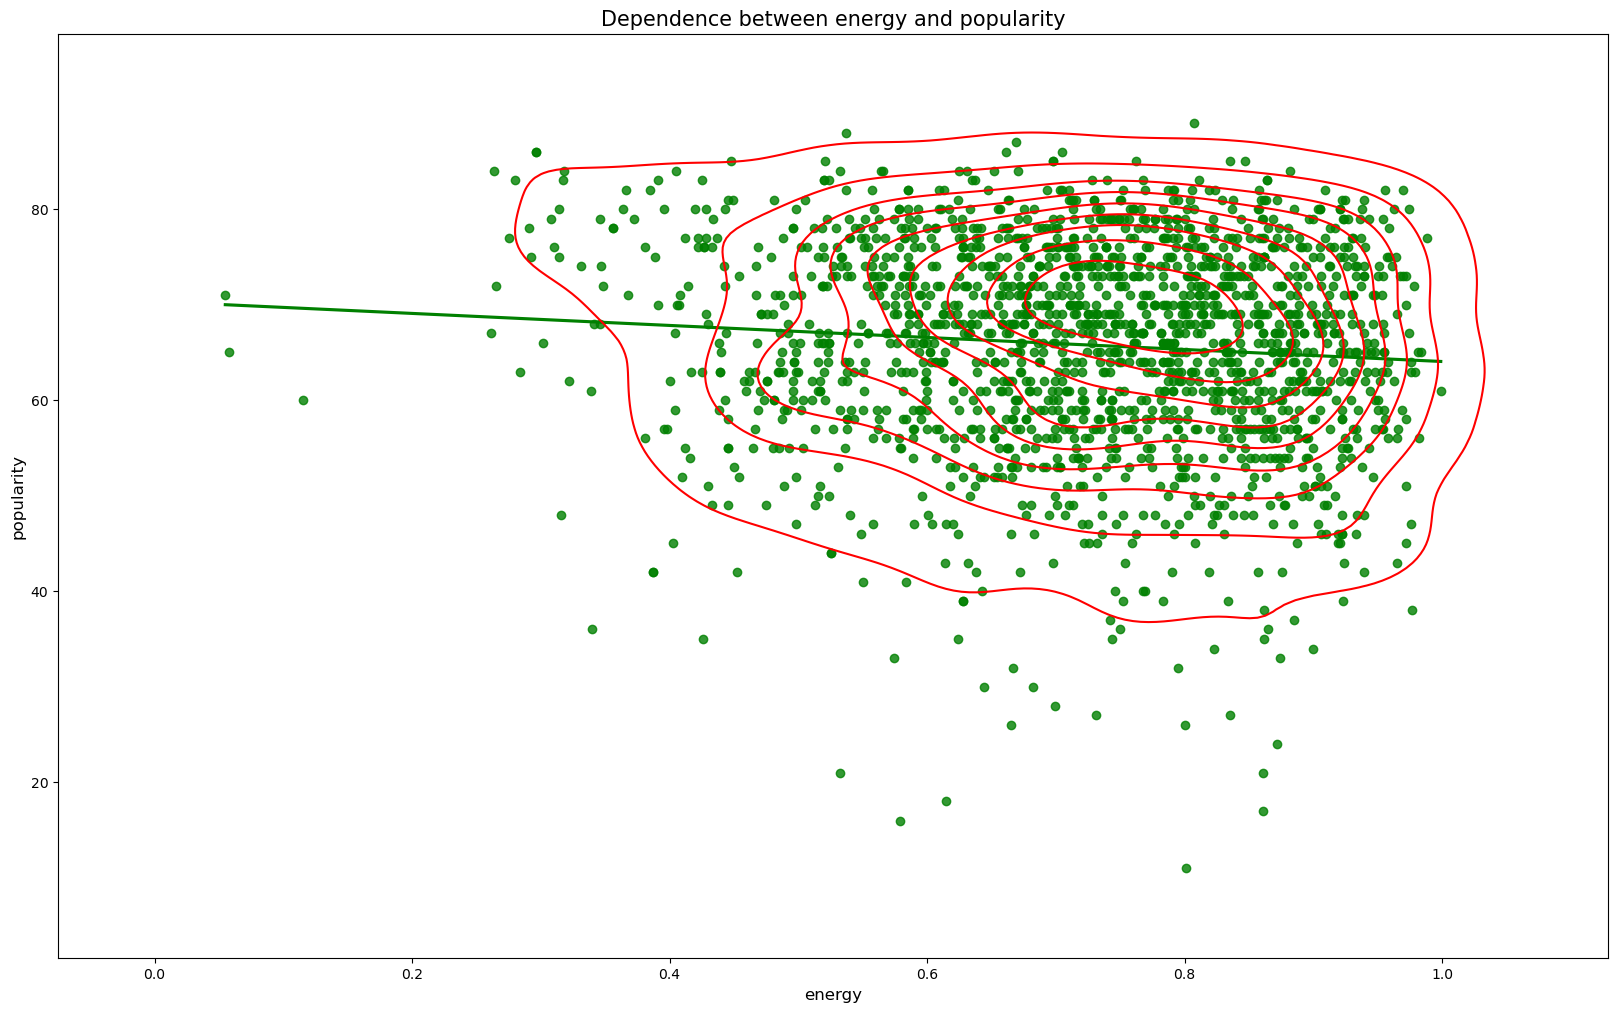

In [21]:
plt.figure(figsize=(20,12))
sns.regplot(data=df, x='energy', y='popularity', ci=None, color='green')
sns.kdeplot(x=df.energy, y=df.popularity, color='red')
plt.ylabel('popularity', fontsize=12)
plt.xlabel("energy", fontsize=12)
plt.title('Dependence between energy and popularity', fontsize=15)
plt.show()

<Figure size 2000x1200 with 0 Axes>

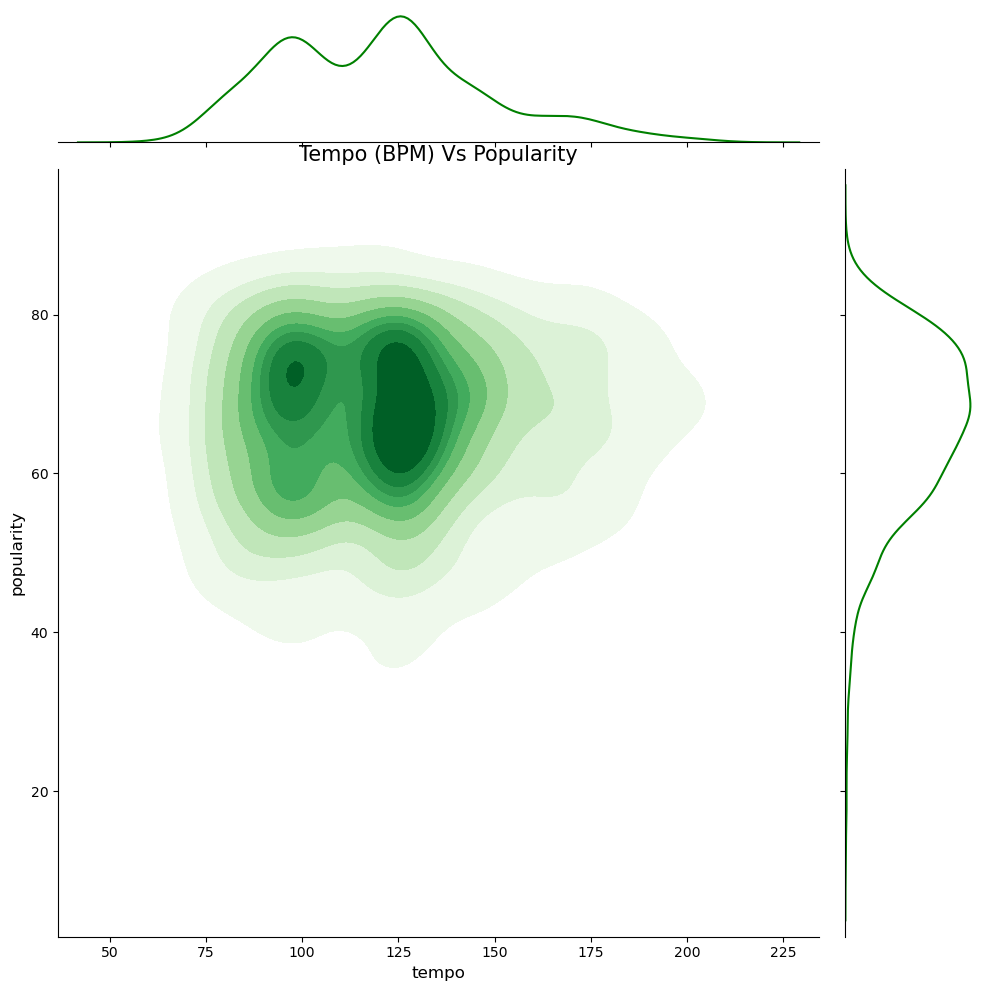

In [22]:
plt.figure(figsize=(20,12))
fig = sns.jointplot(data=df, x='tempo', y='popularity', kind="kde", color='green', shade=True, cmap="Greens", height=10)
plt.ylabel('popularity', fontsize=12)
plt.xlabel("tempo", fontsize=12)
plt.title("Tempo (BPM) Vs Popularity", fontsize=15)
plt.show()

In [23]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', 
                                                '<i>loudness', '<i>speechiness', '<i>acousticness', 
                                                '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=df['popularity'], name='popularity'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['danceability'], name='danceability'), row=1, col=2)
fig.add_trace(go.Histogram(x=df['energy'], name='energy'), row=1, col=3)
fig.add_trace(go.Histogram(x=df['loudness'], name='loudness'), row=2, col=1)
fig.add_trace(go.Histogram(x=df['speechiness'], name='speechiness'), row=2, col=2)
fig.add_trace(go.Histogram(x=df['acousticness'], name='acousticness'), row=2, col=3)
fig.add_trace(go.Histogram(x=df['liveness'], name='liveness'), row=3, col=1)
fig.add_trace(go.Histogram(x=df['valence'], name='valence'), row=3, col=2)
fig.add_trace(go.Histogram(x=df['tempo'], name='tempo'), row=3,col=3)
fig.update_layout(height=900, width=900, title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark', title_x=0.5)

In [24]:
expanded_df.iloc[:, 0:] = expanded_df.iloc[:, 0:].replace({False: 0, True: 1})
expanded_df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Dance/Electronic,Folk/Acoustic,R&B,country,hip hop,latin,metal,pop,rock
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,0,0,0,0,0,0,0,1,0
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,0,0,0,0,0,0,0,1,1
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,0,0,0,1,0,0,0,1,0
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,0,0,0,0,0,0,1,0,1
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,0,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,0,0,0,0,0,0,0,1,0
1996,Taylor Swift,Cruel Summer,178426,0,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,0,0,0,0,0,0,0,1,0
1997,Blanco Brown,The Git Up,200593,0,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,0,0,0,1,1,0,0,0,0
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,0,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,0,0,0,0,0,0,0,1,0


In [25]:
selected_columns = ['duration_ms', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'valence']

mod_df = df[selected_columns]
mod_df

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,valence
0,211160,77,0.751,0.834,-5.444,0.0437,0.3000,0.894
1,167066,79,0.434,0.897,-4.918,0.0488,0.0103,0.684
2,250546,66,0.529,0.496,-9.007,0.0290,0.1730,0.278
3,224493,78,0.551,0.913,-4.063,0.0466,0.0263,0.544
4,200560,65,0.614,0.928,-4.806,0.0516,0.0408,0.879
...,...,...,...,...,...,...,...,...
1995,181026,79,0.842,0.734,-5.065,0.0588,0.0427,0.952
1996,178426,78,0.552,0.702,-5.707,0.1570,0.1170,0.564
1997,200593,69,0.847,0.678,-8.635,0.1090,0.0669,0.811
1998,171029,75,0.741,0.520,-7.513,0.0656,0.4500,0.347


In [26]:
fig=px.imshow(mod_df.corr(), text_auto=True, height=1000, width=1000, color_continuous_scale=px.colors.sequential.Greens, 
              aspect='auto')
fig.update_layout(title_x=0.5, title={'text':'<b>Correlation of columns</b>','font':{'size':25}}, 
                  title_font_family="Arial", title_font_color="seagreen")
fig.show()

In [57]:
X = mod_df.drop(columns=['popularity'])
y = mod_df['popularity']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 262.40277777777777
Mean Absolute Error: 11.875


In [30]:
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_df

,Feature,Importance
0,duration_ms,0.190930
1,danceability,0.153633
2,energy,0.155326
3,loudness,0.122029
4,speechiness,0.104826
5,acousticness,0.170647
6,valence,0.102610


In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 106.27406766666915
Mean Absolute Error: 8.29703260893546


In [79]:
selector = SelectKBest(k='all')

selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, max_depth=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

import pickle

# Assuming your model is named 'model'
with open('random_forest_model.h5', 'wb') as file:
    pickle.dump(model, file)

Mean Squared Error: 111.23169884675926
Mean Absolute Error: 8.277139814814815


In [80]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

,Actual,Predicted
1768,72,69.020000
1005,76,65.400000
928,66,66.690000
172,56,65.240000
1375,57,63.560000
...,...,...
815,63,56.390000
1606,72,62.130000
1927,78,66.210000
1373,74,69.420000


In [81]:
model.predict(X_test)[0]

69.02

In [83]:
with open('random_forest_model.h5', 'rb') as file:
    rf = pickle.load(file)
    
# X_test.head()
rf.predict(X_test)

array([69.02      , 65.4       , 66.69      , 65.24      , 63.56      ,
       64.13      , 61.77      , 66.27      , 67.18      , 66.01      ,
       67.27      , 64.79      , 64.29      , 68.71      , 67.49      ,
       61.31      , 59.2       , 65.08      , 63.13      , 69.77      ,
       64.62      , 61.93      , 60.7       , 63.4       , 65.6       ,
       66.44      , 63.09      , 61.5       , 64.58      , 66.29      ,
       69.06      , 66.2015    , 64.4       , 72.43666667, 63.76      ,
       68.48      , 67.84      , 60.34      , 65.79      , 65.91      ,
       70.62      , 66.89      , 66.13      , 61.18      , 65.33      ,
       65.15      , 67.72      , 61.67      , 61.95      , 67.69      ,
       62.48      , 64.97      , 69.02      , 66.42      , 70.18      ,
       67.72      , 67.82      , 64.36      , 72.74      , 72.08      ,
       66.65      , 65.13      , 68.35      , 64.05      , 69.64      ,
       66.23      , 69.12      , 63.77      , 61.5       , 49.32

In [64]:
selector = SelectFromModel(RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                 max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
                                                 min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, 
                                                 n_estimators=100, n_jobs=-1, oob_score=False, random_state=0, verbose=0, 
                                                 warm_start=False), 
                          max_features=None, norm_order=1, prefit=False, threshold=0.15)

selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, max_depth=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 153.0082028343762
Mean Absolute Error: 9.783173445767195


In [34]:
base_regressor = DecisionTreeRegressor(random_state=42)

model = BaggingRegressor(estimator=base_regressor, n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Bagging Regressor with Decision Tree base estimator:")
# print("Mean Squared Error:", mse)
# print("Mean Absolute Error:", mae)
# print("R-squared:", r2)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -8.268 (0.383)


In [35]:
# Create an XGBoost Regressor model
model = xgb.XGBRegressor(learning_rate=0.1, n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)

print("XGBoost Regressor:")
print("Mean Squared Error:", mse_xgb)
print("Mean Absolute Error:", mae_xgb)

XGBoost Regressor:
Mean Squared Error: 120.78074313200806
Mean Absolute Error: 8.588792345258925


In [36]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_regressor.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("\nGradient Boosting Regressor:")
print("Mean Squared Error:", mse_gb)
print("Mean Absolute Error:", mae_gb)


Gradient Boosting Regressor:
Mean Squared Error: 114.5392026552508
Mean Absolute Error: 8.5444546294665


In [37]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.30174495, 0.2060344 ])

In [39]:
model = xgb.XGBRegressor(learning_rate=0.1, n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 115.94825990898627
Mean Absolute Error: 8.893877930111355


In [40]:
alt_df = pd.read_csv('spotify_tracks.csv', index_col=0)
alt_df

,acousticness,danceability,duration_ms,energy,loudness,popularity,speechiness,valence
0,0.9950,0.708,158648,0.1950,-12.428,0,0.0506,0.7790
1,0.9940,0.379,282133,0.0135,-28.454,0,0.0462,0.0767
2,0.6040,0.749,104300,0.2200,-19.924,0,0.9290,0.8800
3,0.9950,0.781,180760,0.1300,-14.734,0,0.0926,0.7200
4,0.9900,0.210,687733,0.2040,-16.829,1,0.0424,0.0693
...,...,...,...,...,...,...,...,...
29995,0.2480,0.801,291067,0.5030,-11.982,35,0.2260,0.7270
29996,0.0945,0.769,295333,0.8680,-6.633,37,0.3020,0.5880
29997,0.7040,0.503,283600,0.3030,-12.211,36,0.0247,0.1280
29998,0.1510,0.629,162528,0.7990,-5.662,40,0.0465,0.7020


In [88]:
alt_df.sort_values('popularity', ascending=False)

,acousticness,danceability,duration_ms,energy,loudness,popularity,speechiness,valence
7957,0.0258,0.727,216067,0.815,-2.454,81,0.1530,0.6770
8099,0.0858,0.643,209027,0.769,-3.533,81,0.0877,0.5320
8058,0.1830,0.827,187500,0.629,-3.966,81,0.1850,0.4860
24159,0.0362,0.794,239133,0.855,-1.959,80,0.0466,0.6390
8033,0.1820,0.738,217253,0.748,-4.902,80,0.0453,0.8960
...,...,...,...,...,...,...,...,...
1265,0.9790,0.436,185627,0.279,-16.549,0,0.0735,0.5320
1266,0.9950,0.383,325733,0.242,-17.559,0,0.0520,0.7440
1267,0.9040,0.248,208778,0.199,-17.540,0,0.0380,0.0391
1268,0.2750,0.559,68281,0.457,-13.002,0,0.0527,0.3870


In [45]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 143.06622489815044
Mean Absolute Error: 8.921975507936509


In [46]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_train)
y_pred1 = mlp.predict(X_test)
m1 = mean_absolute_error(y_train, y_pred)
m2 = mean_absolute_error(y_test, y_pred1)
print("MAE of MLP Regressor on training set: {:.3f}".format(m1))
print("MAE of MLP Regressor on test set: {:.3f}".format(m2))

MAE of MLP Regressor on training set: 18.372
MAE of MLP Regressor on test set: 18.425


In [47]:
model.predict([[0.5, 0.5, 20000, 0.5, -10, 0.5, 0.5]])

array([21.57])

In [ ]:
%%writefile app.py

import streamlit as st
import streamlit.components.v1 as components

import pickle

with open('random_forest_model.h5', 'rb') as file:
    model = pickle.load(file)

def predict_popu(duration_ms, danceability, energy, loudness, speechiness, acousticness, valence):
    """
    this method is for prediction process 
    takes all the Audio characteristics thtat we used for modelling and returns the prediction 
    """
    prediction = model.predict([[duration_ms, danceability, energy, loudness, speechiness, acousticness, valence]])
    return prediction[0]

def main():
    st.title("Spotify Songs")
     
    html_temp2 = """
        <div style="background-color:royalblue;padding:10px;border-radius:10px">
        <h2 style="color:white;text-align:center;">Spotify Songs</h2>
        <h1 style="color:white;text-align:center;">Popularity prediction</h1>
        </div>
        """
    # a simple html code for heading which is in blue color and we can even use "st.write()" also ut for back ground color i used this HTML ..... 
    #  to render this we use ...
    components.html(html_temp2)
    # components.html() will render the render the 

    st.image("https://cdn2.downdetector.com/static/uploads/logo/Spotify_Logo_RGB_Green.png", width=700, use_column_width=False)

    # this is to insert the image the in the wed app simple <imag/> tag in HTML
    
    #now lets get the test input from the user by wed app 
    # for this we can use "st.text_input()" which allows use to get the input from the user 
    
    duration_ms = st.number_input("duration_ms", min_value=0, max_value=99999999, value=200000, step=1000)
    danceability = st.number_input("danceability", min_value=0.0, max_value=1.0, value=0.5, step=0.01)
    energy = st.number_input("energy", min_value=0.0, max_value=1.0, value=0.5, step=0.01)
    loudness = st.number_input("loudness", min_value=-60.0, max_value=60.0, value=-10.0, step=0.1)
    speechiness = st.number_input("speechiness", min_value=0.0, max_value=1.0, value=0.5, step=0.01)
    acousticness = st.number_input("acousticness", min_value=0.0, max_value=1.0, value=0.5, step=0.01)
    valence = st.number_input("valence", min_value=0.0, max_value=1.0, value=0.5, step=0.01)
    
    result=""
    # done we got all the user inputs to predict and we need a button like a predict button we do that by "st.button()"
    # after hitting the button the prediction process will go on and then we print the success message by "st.success()"
    if st.button("Predict"):
        result=predict_popu(duration_ms, danceability, energy, loudness, speechiness, acousticness, valence)
        st.success('The Popularity of the song is {}'.format(result))

if __name__=='__main__':
    main()